# Es 11.3

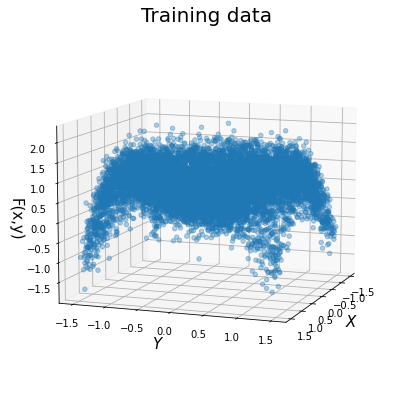

In [53]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

def F2D(x):
    return np.sin(x[:,0]**2 + x[:,1]**2)

n_train = 10000
n_valid = 1000
sigma = 0.3

np.random.seed(0)
xy_train = np.random.uniform(-1.5, 1.5, (n_train,2))
xy_valid = np.random.uniform(-1.5, 1.5, (n_valid,2))

z_target = F2D(xy_train)
z_train = np.random.normal(F2D(xy_train), sigma)
z_valid = np.random.normal(F2D(xy_valid), sigma)

fig = plt.figure(figsize=(12,5))
ax = Axes3D(fig)
ax.set_title("Training data", fontsize=20)
ax.scatter(xy_train[:,0], xy_train[:,1], z_train, label='Training', alpha=0.35)
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
ax.set_zlabel('F(x,y)', fontsize=15)
ax.view_init(10,20)
plt.show()

In [54]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import optimizers, losses, metrics

model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(2,),activation='relu'))
model.add(Dense(16, input_shape=(2,),activation='relu'))
model.add(Dense(8, input_shape=(2,),activation='relu'))
model.add(Dense(4, input_shape=(2,),activation='relu'))
model.add(Dense(1, input_shape=(2,),activation='tanh'))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#model.compile(optimizer='sgd', loss=losses.categorical_crossentropy, metrics=['mse'])
#from tensorflow.keras import optimizers, losses, metrics

# Configure the model for mean-squared error regression.
#model.compile(optimizer=optimizers.SGD(),             #optimizer='sgd',       # stochastic gradient descent
              #loss=losses.categorical_crossentropy,
              #metrics=[metrics.categorical_accuracy]) #metrics=['accuracy'])  # an optional list of metrics

In [55]:
history = model.fit(x=xy_train, y=z_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(xy_valid, z_valid))


Epoch 1/50
313/313 [==============================] - 1s 1ms/step - loss: 0.2575 - mse: 0.2575 - val_loss: 0.2393 - val_mse: 0.2393
Epoch 2/50
313/313 [==============================] - 0s 930us/step - loss: 0.2410 - mse: 0.2410 - val_loss: 0.2372 - val_mse: 0.2372
Epoch 3/50
313/313 [==============================] - 0s 1ms/step - loss: 0.2392 - mse: 0.2392 - val_loss: 0.2356 - val_mse: 0.2356
Epoch 4/50
313/313 [==============================] - 0s 917us/step - loss: 0.2372 - mse: 0.2372 - val_loss: 0.2330 - val_mse: 0.2330
Epoch 5/50
313/313 [==============================] - 0s 921us/step - loss: 0.2351 - mse: 0.2351 - val_loss: 0.2308 - val_mse: 0.2308
Epoch 6/50
313/313 [==============================] - 0s 929us/step - loss: 0.2327 - mse: 0.2327 - val_loss: 0.2282 - val_mse: 0.2282
Epoch 7/50
313/313 [==============================] - 0s 937us/step - loss: 0.2300 - mse: 0.2300 - val_loss: 0.2255 - val_mse: 0.2255
Epoch 8/50
313/313 [==============================] - 0s 956us/ste

32/32 [==============================] - 0s 1ms/step - loss: 0.0934 - mse: 0.0934

Test loss: 0.09341700375080109
Test accuracy: 0.09341700375080109


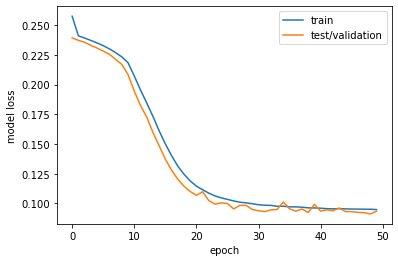

In [56]:
#model.evaluate(x_valid, y_valid, batch_size=32)
# evaluate model
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test/validation'], loc='best')
plt.show()

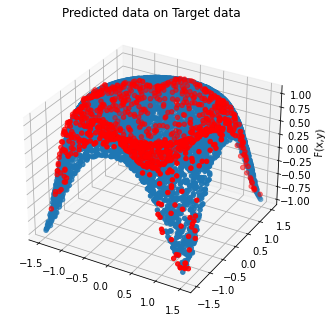

In [57]:
xy_predicted = np.random.uniform(-1.5, 1.5, (1000,2))
z_predicted = model.predict(xy_predicted)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("Predicted data on Target data")
ax.set_zlabel('F(x,y)')
ax.scatter(xy_train[:,0],xy_train[:,1], z_target)
ax.scatter(xy_predicted[:,0], xy_predicted[:,1], z_predicted,c='red')
plt.grid(True); plt.show()